In [1]:
import numpy as np
import matplotlib.pyplot as plt
doplot=2
%matplotlib nbagg
import logging
%load_ext autoreload
%autoreload 2
#logging.basicConfig(level=logging.DEBUG)
log = logging.getLogger('JMK')
log.setLevel(logging.DEBUG)
log.info('Hi')
log.debug('BooWho')
def symclim(pcm):
    cl = pcm.get_clim()
    m = np.max(np.abs(cl))
    pcm.set_clim([-m,m])


/Users/jklymak/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
INFO:JMK:Hi
DEBUG:JMK:BooWho


# Goal:

The goal of this is to emulate Qiang's code that he sent.  This one is in terms of psi

Future: 

  - Simplfy his formulation to take out stuff that I find confusing
  - Change ocean BC to use K formulation
  - Change radiative
  - Change to P and add BBC and cosines

97978.8990826


<IPython.core.display.Javascript object>


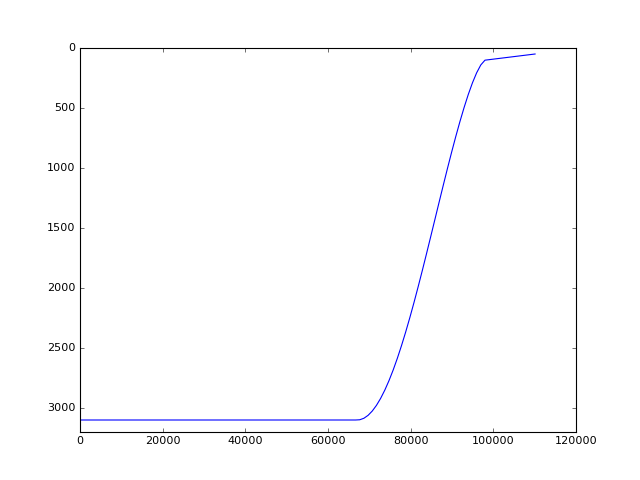

NameError: name 'z0' is not defined

In [3]:
## Need to setup.  We need to make a WKB stretched version of topography...
import matfile as mf
import hdf5storage
from vertmodes import vertModes
# get the exact shelves:

I=110
x = np.linspace(0,110.1e3,I)
#xmod = x/1e3
xmod=x*1.
L = x[-1]
W=31.e3
xs=12.e3
hc = 50.
hs = 100.
h0 = 3100.
hmatch = 40.
xmatch = 13e3

h = h0+0.*x
inds = (x>L-xs-W) 
h[inds]= hs + (h0-hs)*( 0.5*(1-np.cos(np.pi/W*(x[inds]-L+xs))) )**0.75
ind = np.argmin(h)
print x[ind]
h[ind:]=np.linspace(h[ind],hc,len(h)-ind)

# instead lets do what I did in DaleFig4



#Hwkb = np.interp(H,z,zwkb)
fig,ax=plt.subplots()
ax.plot(x,h)
ax.set_ylim(3200,0)
Nsq0 = 2.7e-5*np.exp(z0/500.)
z0=np.arange(-3500.,0.,1.)
f=9.3e-5
omega = np.pi*2./12.4/3600.

xx=x

In [4]:
x,z,H,P,pin1,alpha,beta,G4,=sr.SolveRefl(k=0.5e-4,omega=omega,f=f,wall=True,x=xx,H=h,J=100,z0=z0,Nsq0=Nsq0,)
fig,ax=plt.subplots()
#P = P-np.mean(P[:,0])
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P),rasterized=True,cmap='RdBu_r')#,vmax=1.0, vmin=-1.0)
symclim(pcm)
fig.colorbar(pcm)
#pcm.set_clim(np

NameError: name 'sr' is not defined

In [121]:
ks = np.linspace(0.,1.,80)
resp=0.*ks
for nn,kk in enumerate(ks):
    x,z,H,P,pin1,alpha,beta,G4,=sr.SolveRefl(k=kk*1e-4,omega=omega,f=f,wall=True,x=xx,H=h,J=20,z0=z0,Nsq0=Nsq0,)
    P = P-np.mean(P[:,0])
    resp[nn] = np.sum(np.abs(P[:,x>60.e3]))
    

<IPython.core.display.Javascript object>


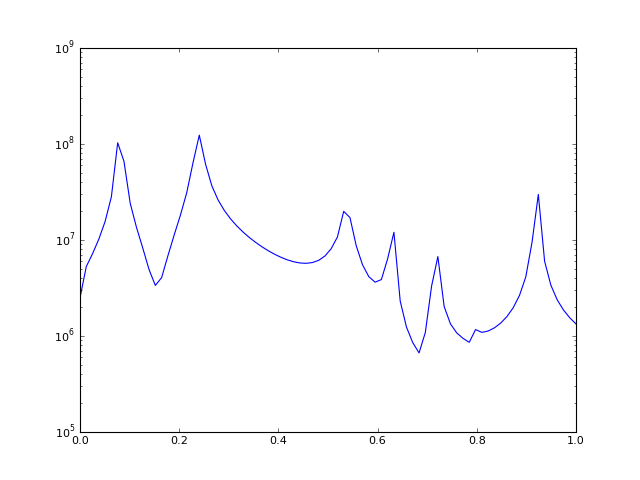

In [122]:
fig,ax=plt.subplots()
ax.semilogy(ks,resp)

<IPython.core.display.Javascript object>


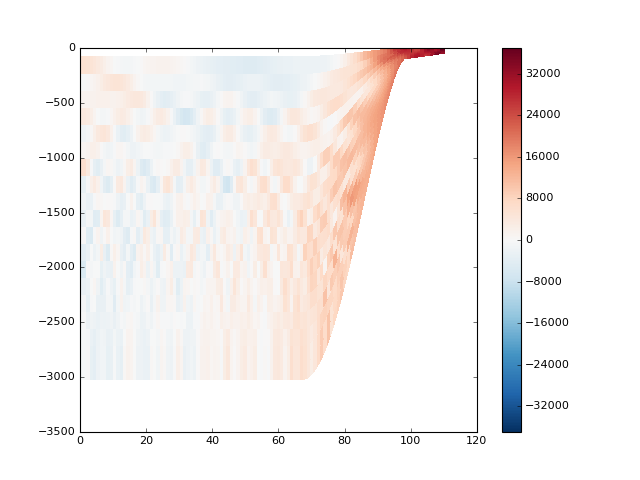

In [125]:
x,z,H,P,pin1,alpha,beta,G4,=sr.SolveRefl(k=0.63*1e-4,omega=omega,f=f,wall=True,x=xx,H=h,J=20,z0=z0,Nsq0=Nsq0,)
fig,ax=plt.subplots()
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-np.mean(P[:,0]),rasterized=True,cmap='RdBu_r')#,vmax=1.0, vmin=-1.0)
symclim(pcm)
#pcm.set_clim([-5000,5000])
fig.colorbar(pcm)

In [3]:
fig,ax=plt.subplots()
z0=np.arange(-3500.,0.,1.)
Nsq0 = ((3.5e-3)**2)*np.exp(z0/50000.)
ax.plot(Nsq0/2.72e-3**2,z0)

In [257]:
import SolveReflPsi as srp
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3500.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*2.72e-3**2
Nsq0 = Nsq0*0.+(2.72e-3)**2
#print Nsq0
#print xmod
I = 220
xx = np.linspace(0.,I*1.e3,I)
hh = 0.*xx+3310.0
hh = 0*hh+3010.
f = 0.e-4
omega = np.pi*2./12.4/3600.
ind = np.where(Nsq0<omega**2)[0]

x,z,H,P,pin1,alpha,beta=srp.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=100,z0=z0,Nsq0=Nsq0,)
#x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
fig = plt.figure(3)
fig.clear()
ax=fig.add_subplot(1,1,1)
P=np.real(P);
offset=np.mean(P)
P=P-0*offset

pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P),rasterized=True,cmap='RdBu_r')#,vmax=1.0, vmin=-1.0)
symclim(pcm)
#pcm.set_clim(np.array([-2000,2000])*10)
fig.colorbar(pcm,ax=ax)
ax.set_title(offset)
ax.set_xlim([0.,np.max(x)/1e3])


Boo
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Len 101 101
[    0.     30.1    60.2    90.3   120.4   150.5   180.6   210.7   240.8
   270.9   301.    331.1   361.2   391.3   421.4   451.5   481.6   511.7
   541.8   571.9   602.    632.1   662.2   692.3   722.4   752.5   782.6
   812.7   842.8   872.9   903.    933.1   963.2   993.3  1023.4  1053.5
  1083.6  1113.7  1143.8  1173.9  1204.   1234.1  1264.2  1294.3  1324.4
  1354.5  1384.6  1414.7  1444.8  1474.9  1505.   1535.1  1565.2  1595.3
  1625.4  1655.5  1685.6  1715.7  1745.8  1775.9  1806.   1836.1  1866.2
  1896.3  1926.4  1956.5  1986.6  2016.7  2046.8  2076.9  2107.   

(0.0, 220.0)

matplotlib.colors.SymLogNorm

In [75]:
import SolveReflOuter as sr
import matplotlib.colors as mcol
mcol.SymLogNorm
f=9.3e-5
f=1.e-4
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(figsize=(8,10))
for nn,ii in enumerate(np.linspace(0,100,7)[:-1]):
    ax=fig.add_subplot(3,2,nn+1)
    I = 250+np.int(ii)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2663.
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]
    x,z,H,P,pin1,pp,alpha,beta,G4=sr.SolveRefl(k=0.,omega=omega,f=f,wall=False,x=xx,H=hh,J=40,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
                #     vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
    ax.set_xlim([0.,300.])
#fig.canvas.manager.show()


3010 3010


<IPython.core.display.Javascript object>

surffac=1.000000
surffac=2.000000
lam 200.078248181j
surffac=1.000000
surffac=2.000000
[    0.            68.28205128   136.56410256   204.84615385   273.12820513
   341.41025641   409.69230769   477.97435897   546.25641026   614.53846154
   682.82051282   751.1025641    819.38461538   887.66666667   955.94871795
  1024.23076923  1092.51282051  1160.79487179  1229.07692308  1297.35897436
  1365.64102564  1433.92307692  1502.20512821  1570.48717949  1638.76923077
  1707.05128205  1775.33333333  1843.61538462  1911.8974359   1980.17948718
  2048.46153846  2116.74358974  2185.02564103  2253.30769231  2321.58974359
  2389.87179487  2458.15384615  2526.43589744  2594.71794872  2663.        ] [-0.02703938 -0.02687268 -0.02654029 -0.02604427 -0.02538769 -0.02457458
 -0.02360996 -0.02249977 -0.02125087 -0.01987095 -0.01836851 -0.01675283
 -0.01503387 -0.01322221 -0.01132904 -0.00936601 -0.00734525 -0.00527919
 -0.00318059 -0.00106238  0.00106238  0.00318059  0.00527919  0.00734525
  0.00936601

SolveReflOuter.py:199: RuntimeWarning: divide by zero encountered in divide
  P[:,I-1]= inv(eye*beta[I-1]).dot(eye-alpha[I-2]-E2d.dot(E2inv))
SolveReflOuter.py:199: RuntimeWarning: invalid value encountered in divide
  P[:,I-1]= inv(eye*beta[I-1]).dot(eye-alpha[I-2]-E2d.dot(E2inv))
SolveReflOuter.py:199: RuntimeWarning: invalid value encountered in multiply
  P[:,I-1]= inv(eye*beta[I-1]).dot(eye-alpha[I-2]-E2d.dot(E2inv))


ValueError: could not broadcast input array from shape (40,40) into shape (40)

surffac=1.000000
surffac=2.000000
lam 248.68907303j


<IPython.core.display.Javascript object>


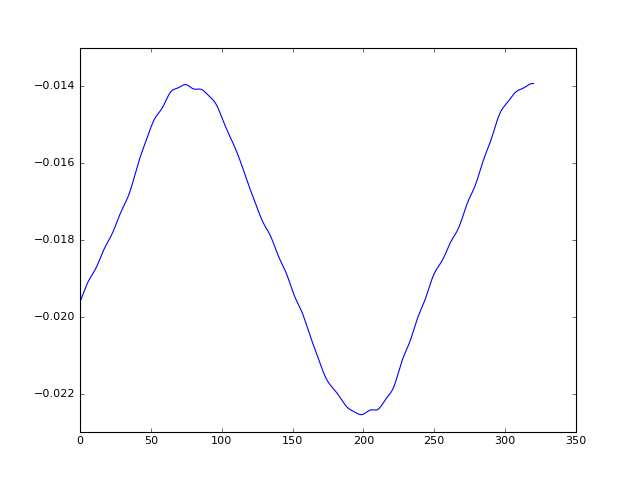

In [70]:
I = 250+70.
xx = np.linspace(0.,I*1.e3,I*2)
hh = 0.*xx+3310.0
x,z,H,P,pin1,pp,alpha,beta,G4=sr.SolveRefl(k=0.,omega=omega,f=f,wall=True,x=xx,H=hh,J=40,z0=z0,Nsq0=Nsq0,)
    
fig,ax=plt.subplots()
ax.plot(x/1.e3,P[10,:])

<IPython.core.display.Javascript object>


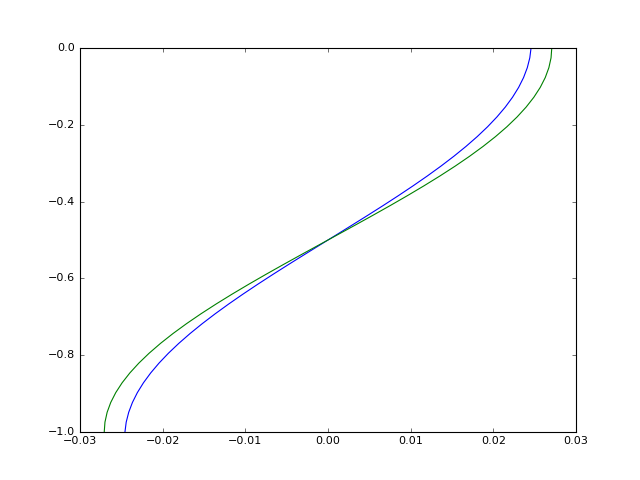

(-3.35126891515e-16+0j)
(-1.11889664201e-16+0j)
(-1.22298005056e-16+0j)
(0.000732714799923+0j)


In [71]:
fig,ax=plt.subplots()
ax.plot(pin1[:,0],z)
ax.plot(pinbad[:,0],z)
print np.sum(pin1[:,0]*pin1[:,1])
print np.sum(pin1[:,0]*pin1[:,2])
print np.sum(pinbad[:,0]*pinbad[:,1])
print np.sum(pinbad[:,0]*pinbad[:,2])


3010 3010


<IPython.core.display.Javascript object>


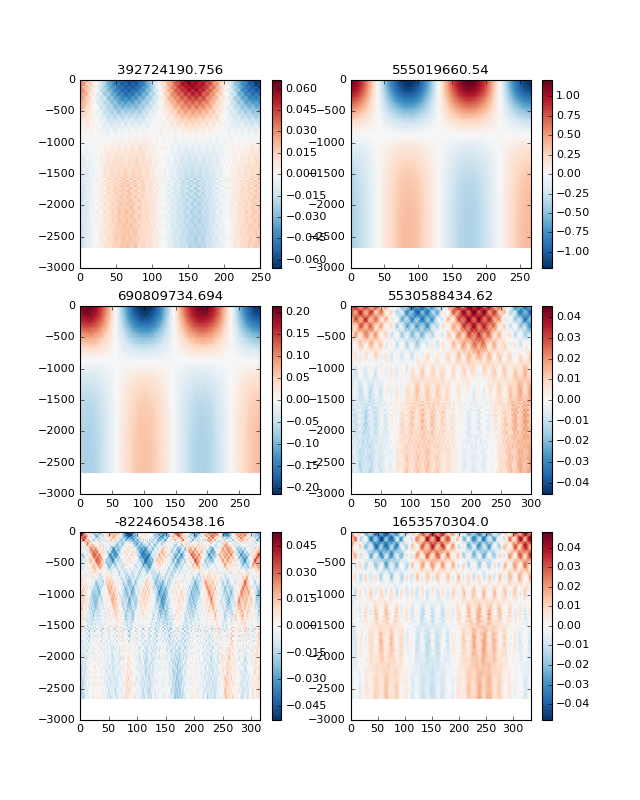

surffac=1.000000
surffac=2.000000
lam 183.215290783j
surffac=1.000000
surffac=2.000000
lam 183.215290783j
surffac=1.000000
surffac=2.000000
lam 183.215290783j
surffac=1.000000
surffac=2.000000
lam 183.215290783j
surffac=1.000000
surffac=2.000000
lam 183.215290783j
surffac=1.000000
surffac=2.000000
lam 183.215290783j


In [72]:
f=9.3e-5
f=1.e-4
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
#Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(figsize=(8,10))
for nn,ii in enumerate(np.linspace(0,100,7)[:-1]):
    ax=fig.add_subplot(3,2,nn+1)
    I = 250+np.int(ii)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2663.
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]
    x,z,H,P,pin1,pp,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=True,x=xx,H=hh,J=100,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
                #     vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()


In [53]:
c1=3.72e-3*2663/np.pi
k = np.sqrt((omega**2-f**2)/c1**2)
print c1,np.pi*2./k/1e3

k = np.pi*2./200.e3
c1 = np.sqrt((omega**2-f**2)/k**2)
H = c1*np.pi/3.72e-3
print H

3.1532923241 200.024157314
2662.67838421


3010 3010


<IPython.core.display.Javascript object>


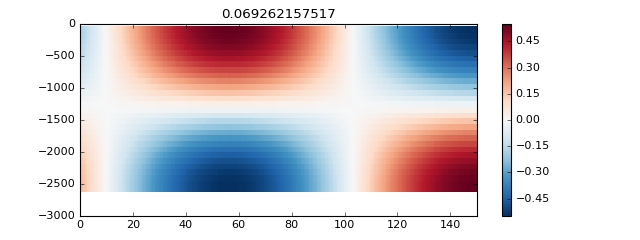

[ 3.15434267  1.57933576  1.05530159  0.79401759  0.63784155  0.53422803
  0.46065933  0.40587821  0.36363215  0.33017108]
6371978.55096 [ 3.15434267  1.57933576  1.05530159  0.79401759  0.63784155  0.53422803
  0.46065933  0.40587821  0.36363215  0.33017108]
-0.257845037142 (1+0j) (1+0.0157533474697j)
(0.999875918588+0.0157526958985j)
lam 200.090784418j
[[ 0.96412420+0.j -0.02589947+0.j -0.04509504+0.j -0.01812781+0.j
  -0.05085559+0.j -0.01476639+0.j -0.05163763+0.j -0.01652324+0.j
  -0.04759578+0.j -0.02240961+0.j -0.04044835+0.j -0.03014778+0.j
  -0.03281340+0.j -0.03702610+0.j -0.02724546+0.j -0.04087803+0.j
  -0.02533376+0.j -0.04082183+0.j -0.02719312+0.j -0.03749369+0.j
  -0.03152486+0.j -0.03270346+0.j -0.03620630+0.j -0.02866160+0.j
  -0.03916808+0.j -0.02708645+0.j -0.03921310+0.j -0.02854019+0.j
  -0.03646039+0.j -0.03224769+0.j]
 [-0.02589947+0.j  0.94492863+0.j  0.00106777+0.j -0.07782282+0.j
   0.01796139+0.j -0.08772683+0.j  0.02034801+0.j -0.08271018+0.j
   0.00866293+

In [35]:
import SolveReflOuter as sr
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(12,figsize=(8,3))
fig.clf()
if 1:
    I =150
    ax=fig.add_subplot(1,1,1)
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+2662.67
    f = 1.e-4
    omega = np.pi*2./12.4/3600.
    ind = np.where(Nsq0<omega**2)[0]

    x,z,H,P,E1,psi,alpha,beta,G4,=sr.SolveRefl(k=0.,omega=omega,f=f,wall=True,x=xx,H=hh,J=30,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r')
    symclim(pcm)
    #                 vmax = 0.5,vmin=-0.5)#,vmax=1.0, vmin=-1.0)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()



<IPython.core.display.Javascript object>


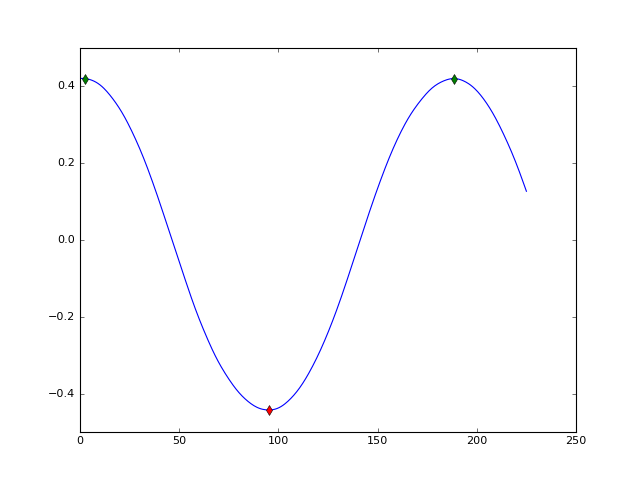

376
[   2.50556793   95.21158129  188.41870824]
[ 92.70601336  93.20712695]
185.913140312


In [29]:
fig,ax=plt.subplots()
ax.plot(x/1e3,P[10,:])
from scipy.signal import argrelextrema
Psm = np.convolve(P[10,:],np.ones(10)/10.,mode='same')
#Psm = P[10,:]
ind = argrelextrema(Psm,np.greater)
ax.plot(x[ind]/1e3,Psm[ind],'d')
ind2 = argrelextrema(Psm,np.less)
ax.plot(x[ind2]/1e3,Psm[ind2],'d')
ind = np.hstack((ind,ind2))[0]
print np.max(ind)
print x[np.sort(ind)]/1e3
print np.diff(x[np.sort(ind)]/1e3)
print (x[np.max(ind)]-x[np.min(ind)])/1e3/(len(ind)-1)*2.

In [106]:
print betath 
print beta[0]

[-0.-0.01573195j -0.-0.01571642j -0.-0.01568539j -0.-0.01563887j
 -0.-0.01557692j -0.-0.0154996j  -0.-0.01540698j -0.-0.01529916j
 -0.-0.01517624j -0.-0.01503834j -0.-0.0148856j  -0.-0.01471817j
 -0.-0.01453622j -0.-0.01433992j -0.-0.01412947j -0.-0.01390507j
 -0.-0.01366695j -0.-0.01341535j -0.-0.0131505j  -0.-0.01287268j
 -0.-0.01258215j -0.-0.01227921j -0.-0.01196414j -0.-0.01163727j
 -0.-0.01129892j -0.-0.01094941j -0.-0.0105891j  -0.-0.01021834j
 -0.-0.0098375j  -0.-0.00944695j -0.-0.00904707j -0.-0.00863826j
 -0.-0.00822093j -0.-0.00779549j -0.-0.00736236j -0.-0.00692195j
 -0.-0.00647472j -0.-0.0060211j  -0.-0.00556153j -0.-0.00509648j
 -0.-0.0046264j  -0.-0.00415175j -0.-0.003673j   -0.-0.00319063j
 -0.-0.00270511j -0.-0.00221692j -0.-0.00172655j -0.-0.00123447j
 -0.-0.00074117j -0.-0.00024714j  0.+0.00024714j  0.+0.00074117j
  0.+0.00123447j  0.+0.00172655j  0.+0.00221692j  0.+0.00270511j
  0.+0.00319063j  0.+0.003673j    0.+0.00415175j  0.+0.0046264j
  0.+0.00509648j  0.+0.005

3010 3010


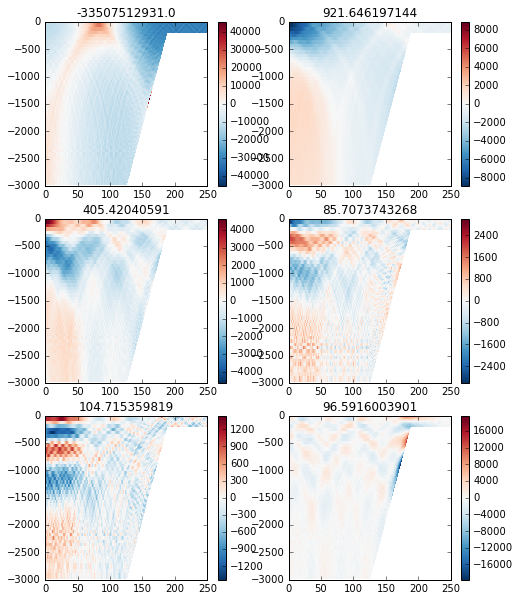

In [154]:
%matplotlib inline
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3010.,0.,1.)
Nsq0 = 1.e-4*np.exp(z0/500.)
Nsq0 = Nsq0/np.mean(Nsq0)*3.72e-3**2
#Nsq0 = Nsq0*0.+(3.72e-3)**2
print len(z0),len(Nsq0)
#print Nsq0
#print xmod
fig=plt.figure(12,figsize=(8,10))
fig.clf()

for nn,kk in enumerate(np.linspace(0.,2.e-4,6)):
    ax=fig.add_subplot(3,2,nn+1)
    I = 250
    xx = np.linspace(0.,I*1.e3,I*2)
    hh = 0.*xx+3310.0
    hh = 0*hh+3010.
    I = len(xx)
    hh[I/2:3*I/4]=np.linspace(hh[I/2],200.,I/4)
    hh[3*I/4:]=200.
    f = 1.e-4
    omega = np.pi*2./12.4/3600.

    x,z,H,P,pin1,alpha,beta,G4,=sr.SolveRefl(k=kk,omega=omega+1e-6,f=f,wall=True,x=xx,H=hh,J=50,z0=z0,Nsq0=Nsq0,)
    #x,z,H,P=SolveRefl(k=0.000,omega=omega,f=f,wall=True,J=30*2,Nsq0=Nsq0[0])
    
    P=np.real(P);
    offset=np.mean(P[:,0])

    pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*H[np.newaxis,:],np.real(P)-offset,rasterized=True,cmap='RdBu_r',
                     )#,vmax=1.0, vmin=-1.0)
    symclim(pcm)
    fig.colorbar(pcm,ax=ax)
    ax.set_title(offset)
    ax.set_xlim([0.,np.max(x)/1e3])
#fig.canvas.manager.show()


In [37]:
print alpha[-3]
print beta[-3]
print np.shape(alpha[-3])
eye = np.eye(np.shape(alpha[-3])[0])
print (np.linalg.inv(eye-alpha[-3])).dot(eye-alpha[-3])

[[-0.00000000-0.j          0.00339830+0.02453053j  0.00469758+0.02450058j
  ..., -0.03741988-0.05668728j -0.02113721-0.08655011j -0.00000000-0.j        ]
 [-0.00000000-0.j          0.00339830+0.02453053j  0.00469758+0.02450058j
  ..., -0.03741988-0.05668728j -0.02113721-0.08655011j -0.00000000-0.j        ]
 [-0.00000000-0.j          0.00469768+0.02449988j  0.00468691+0.02446999j
  ..., -0.03734369-0.05663585j -0.02118311-0.08646384j -0.00000000-0.j        ]
 ..., 
 [-0.00000000-0.j         -0.03709097-0.05631486j -0.03701386-0.05626439j
  ...,  0.08275940+0.19752048j  0.45319757+0.25545587j -0.00000000-0.j        ]
 [-0.00000000-0.j         -0.02035336-0.087829j   -0.02039873-0.08774324j
  ...,  0.45189008+0.25736703j  0.17229725+0.45557926j -0.00000000-0.j        ]
 [-0.00000000-0.j         -0.02035336-0.087829j   -0.02039873-0.08774324j
  ...,  0.45189008+0.25736703j  0.17229725+0.45557926j -0.00000000-0.j        ]]
[-0.01683235-0.07110575j -0.01683235-0.07110575j -0.01683240-0.07110

In [38]:
fig = plt.figure(6)
fig.canvas.manager.show()
fig.clear()

ax=fig.add_subplot(1,1,1)
ax.plot(P[:,0]-pin1-np.mean(P[:,0]),z)
print(P[:,-1])
ax.plot(pin1,z)
ax.plot(P[:,-1]-P[:,-2],z,'m')
#ax.plot(p1,z)
#ax.plot(p2,z)

#ax.plot(P[:,-2],z,'r')
ax.grid()
print np.sum(pin1**2*np.median(np.diff(z)))

[  3.18464392e-05   3.18464382e-05   3.18464405e-05   3.18464380e-05
   3.18464388e-05   3.18464400e-05   3.18464386e-05   3.18464390e-05
   3.18464393e-05   3.18464394e-05   3.18464392e-05   3.18464387e-05
   3.18464402e-05   3.18464389e-05   3.18464390e-05   3.18464405e-05
   3.18464381e-05   3.18464403e-05   3.18464391e-05   3.18464393e-05
   3.18464398e-05   3.18464392e-05   3.18464396e-05   3.18464394e-05
   3.18464394e-05   3.18464395e-05   3.18464392e-05   3.18464394e-05
   3.18464392e-05   3.18464393e-05   3.18464391e-05   3.18464393e-05
   3.18464391e-05   3.18464393e-05   3.18464391e-05   3.18464393e-05
   3.18464391e-05   3.18464393e-05   3.18464392e-05   3.18464394e-05
   3.18464392e-05   3.18464395e-05   3.18464393e-05   3.18464395e-05
   3.18464394e-05   3.18464396e-05   3.18464393e-05   3.18464395e-05
   3.18464393e-05   3.18464394e-05   3.18464391e-05   3.18464393e-05
   3.18464390e-05   3.18464392e-05   3.18464390e-05   3.18464392e-05
   3.18464391e-05   3.18464394e-05

In [163]:
#f=1e-4
f=9.3e-5
log.setLevel(logging.INFO)
z0=np.arange(-3500.,0.,1.)
Nsq0 = 2.7e-5*np.exp(z0/1300.)

x,z,H,P=SolveRefl(k=0.638e-4,omega=0.75*f,f=f,wall=True,x=xmod,H=h,J=30*2,z0=z0,Nsq0=Nsq0)
fig,ax=plt.subplots()
pcm=ax.pcolormesh(x/1e3,z[:,np.newaxis]*h[np.newaxis,:],P,rasterized=True,cmap='RdBu_r')
symclim(pcm)
#pcm.set_clim(np.array([-2000,2000])*10)
fig.colorbar(pcm,ax=ax)

NameError: name 'SolveRefl' is not defined

In [692]:
print alpha[0]

NameError: name 'alpha' is not defined

## Get linear response

Compicated because the peaks are not always trivial to see...

In [9]:
ks = np.linspace(0,1.03,100)
ks = ks[1:]*1e-4
f=9.3e-5
oms = np.linspace(0.,2.03,51)*f
oms = np.array([0.2,0.75])*f
oms=oms[1:]

resp = []
for numb,hin in enumerate([0]):
    resp.append(np.zeros((len(oms),len(ks))))
    for m,omega in enumerate(oms):
        print m
        for n,k in enumerate(ks):
            Hin=h
            x,z,H,P=SolveRefl(k=k,omega=omega,f=f,wall=True,x=xmod,H=h,J=60,z0=z0,Nsq0=Nsq0)
            res=1.e-99
            for num,dt in enumerate(np.linspace(0.,np.pi,100)):
                ind = np.where(x>60e3)[0]
                re=np.mean(np.abs(np.real(P[:,ind]*np.exp(1j*dt)))*H[np.newaxis,ind])
                if re>res:
                    res=re
            resp[numb][m,n]=res


0


<IPython.core.display.Javascript object>


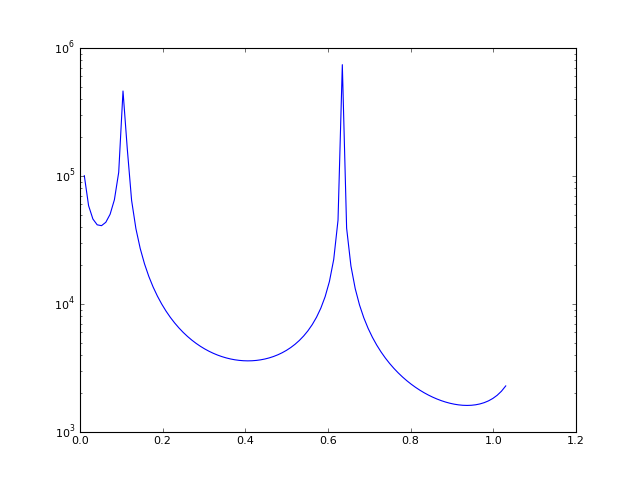

In [10]:
fig,ax = plt.subplots()
ax.semilogy(ks*1e4,resp[0][0,:])